# Estudio analítico de la iconografía del Museo Nacional Del Prado

In [1]:
#Import your libraries

import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns
import difflib
import networkx as nx

In [2]:
#%pip install pyecharts
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType

In [3]:
obras_completo = pd.read_csv("/Users/karmelealonsoaia/Desktop/ironhack_labs/PROYECTOS/project_final/data/data_clean/obras_completo.csv")

# Objetivos Generales

# Hipótesis

- Las representaciones iconográficas en los cuadros guardan relación con el tiempo y la edad en la que han sido representados.
- También existe correlación entre estas representaciones iconográficas y las escuelas.

# Motivaciones

# Objetivos Generales

• Conocer la relación fecha-iconografía
• Conocer la correlación y concordancia fecha-escuelas

# Objetivos Específicos

• Conocer la relación fecha-iconografía.
• Conocer la relación fecha-escuelas.

• Conocer la correlación y concordancia fecha-iconografía.
• Conocer la correlación y concordancia fecha-escuelas.

# Material y métodos

# Criterios de inclusión

- Que se encuentre en el Museo del Prado y que tengan al menos un objeto iconográfico.
- Que tengan al menos una información iconográfica para poder contar con las variables necesarias.
- En el caso de flora y fauna, contar con su nombre en latín, el resto fueron descartados.

# Lista de variables:

1. Iconográficas
- Personajes
- Objetos
- Flora
- Fauna
- Lugar
2. Escuelas
...

# Análisis descriptivo

In [4]:
obras_completo.head()

,TituloID,Título,Autor,Fecha,Año,Escuela,Objetos,Fauna,Flora,Lugar,Personajes,Obra_uri,Imágenes,Fecha_rango
0,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Enseres domésticos ; Florero ; Instrumentos de...,NaN,Anémona (Anemone spp.) ; Gladiolo (Gladiolus s...,NaN,NaN,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
1,1,"""La Anunciación""",Maestro de la Sisla,Hacia 1500,1495,Española,Libro,NaN,Azucena (Lilium candidum),NaN,Virgen María,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1495
2,2,"""Copa de la Vendimia""","Fontana, Annibale ; Taller de los Sarachi",1570 - 1600,1570,Italiana,NaN,NaN,Vid / Parra (Vitis vinifera),NaN,NaN,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1570 - 1600
3,3,"""Florero""","Pérez, Bartolomé",Hacia 1676,1671,Española,NaN,Artrópodos (Filo: Arthropoda),Ajenuz / Arañuela (Nigella damascena) ; Anémon...,NaN,NaN,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1671
4,4,"""La Inmaculada Concepción""","Maella, Mariano Salvador",Hacia 1781,1776,Española,Elementos heráldicos y nobiliarios ; Insignia ...,NaN,Azucena (Lilium candidum),NaN,Virgen María ; Ángel / ángeles,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1776


In [5]:
obras_completo['Escuela'].unique()

array(['Italiana', 'Española', 'Flamenca', 'Francesa',
       'Hispano-cartaginesa', 'Italiana ; Veneciana',
       'Castellana ; Española', 'Francesa ; Italiana', 'Holandesa',
       'Alemana', 'Española ; Madrileña', 'Italiana ; Napolitana',
       'Arte Clásico ; Roma', 'Boloñesa ; Italiana', 'Gala',
       'Desconocida', 'Púnica', 'Hispano-flamenca',
       'Española ; Valenciana', 'Florentina ; Italiana', 'Inglesa',
       'Sueca', 'Castellana ; Española ; Toledana',
       'Francesa ; Italiana ; Milanesa', 'Portuguesa'], dtype=object)

In [6]:
obras_completo.columns

Index(['TituloID', 'Título', 'Autor', 'Fecha', 'Año', 'Escuela', 'Objetos',
       'Fauna', 'Flora', 'Lugar', 'Personajes', 'Obra_uri', 'Imágenes',
       'Fecha_rango'],
      dtype='object')

In [7]:
obras_completo.isnull().sum()

TituloID         0
Título           0
Autor            0
Fecha            0
Año              0
Escuela          0
Objetos        336
Fauna          467
Flora            0
Lugar          607
Personajes     346
Obra_uri         0
Imágenes         0
Fecha_rango      0
dtype: int64

In [8]:
obras_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TituloID     655 non-null    int64 
 1   Título       655 non-null    object
 2   Autor        655 non-null    object
 3   Fecha        655 non-null    object
 4   Año          655 non-null    int64 
 5   Escuela      655 non-null    object
 6   Objetos      319 non-null    object
 7   Fauna        188 non-null    object
 8   Flora        655 non-null    object
 9   Lugar        48 non-null     object
 10  Personajes   309 non-null    object
 11  Obra_uri     655 non-null    object
 12  Imágenes     655 non-null    object
 13  Fecha_rango  655 non-null    object
dtypes: int64(2), object(12)
memory usage: 71.8+ KB


In [9]:
obras_completo.describe(include='object')

,Título,Autor,Fecha,Escuela,Objetos,Fauna,Flora,Lugar,Personajes,Obra_uri,Imágenes,Fecha_rango
count,655,655,655,655,319,188,655,48,309,655,655,655
unique,462,300,327,25,214,110,305,27,147,655,655,299
top,"""Florero""",Anónimo,Siglo XVII,Española,Enseres domésticos ; Florero,Paloma (Columba ssp),Azucena (Lilium candidum),Alsasua ; España ; Navarra,Virgen María,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,Siglo XVII
freq,68,85,81,368,19,30,81,4,18,1,1,81


In [10]:
obras_completo.describe()

,TituloID,Año
count,655.000000,655.000000
mean,327.000000,1694.780153
std,189.226496,234.164819
min,0.000000,-400.000000
25%,163.500000,1601.000000
50%,327.000000,1680.000000
75%,490.500000,1832.000000
max,654.000000,1969.000000


In [11]:
obras_completo['Objetos'] = obras_completo['Objetos'].fillna('Desconocidos')
obras_completo['Fauna'] = obras_completo['Fauna'].fillna('Desconocida')
obras_completo['Lugar'] = obras_completo['Lugar'].fillna('Desconocido')
obras_completo['Personajes'] = obras_completo['Personajes'].fillna('Desconocidos')

In [12]:
obras_completo.isnull().any()

TituloID       False
Título         False
Autor          False
Fecha          False
Año            False
Escuela        False
Objetos        False
Fauna          False
Flora          False
Lugar          False
Personajes     False
Obra_uri       False
Imágenes       False
Fecha_rango    False
dtype: bool

In [13]:
duplicados = obras_completo[obras_completo.duplicated()]
duplicados

,TituloID,Título,Autor,Fecha,Año,Escuela,Objetos,Fauna,Flora,Lugar,Personajes,Obra_uri,Imágenes,Fecha_rango


In [14]:
cols = ['Personajes', 'Objetos', 'Fauna', 'Flora', 'Lugar']

In [15]:
for col in cols:
    obras_completo[col] = obras_completo[col].str.split(';')
    obras_completo = obras_completo.explode(col)
    obras_completo[col] = obras_completo[col].str.strip()

In [16]:
obras_completo = obras_completo.reset_index(drop=True)

In [17]:
obras_completo.head(10)

,TituloID,Título,Autor,Fecha,Año,Escuela,Objetos,Fauna,Flora,Lugar,Personajes,Obra_uri,Imágenes,Fecha_rango
0,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Enseres domésticos,Desconocida,Anémona (Anemone spp.),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
1,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Enseres domésticos,Desconocida,Gladiolo (Gladiolus spp.),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
2,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Enseres domésticos,Desconocida,Lirio (Iris germanica),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
3,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Enseres domésticos,Desconocida,Mundillo / Bola de nieve (Viburnum opulus L.),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
4,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Enseres domésticos,Desconocida,Peonía (Paeonia),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
5,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Enseres domésticos,Desconocida,Rosa (Rosa),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
6,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Enseres domésticos,Desconocida,Tulipán (Tulipa spp.),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
7,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Florero,Desconocida,Anémona (Anemone spp.),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
8,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Florero,Desconocida,Gladiolo (Gladiolus spp.),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642
9,0,"""Floreros""","Nuzzi, Mario",1640 - 1642,1640,Italiana,Florero,Desconocida,Lirio (Iris germanica),Desconocido,Desconocidos,http://museodelprado.es/items/E22_Man-Made_Obj...,https://content3.cdnprado.net/imagenes/Documen...,1640 - 1642


In [18]:
obras_completo.shape

(21737, 14)

In [19]:
#Vuelco a rellenar los nulos del mismo modo:
obras_completo['Objetos'] = obras_completo['Objetos'].fillna('Desconocidos')
obras_completo['Fauna'] = obras_completo['Fauna'].fillna('Desconocida')
obras_completo['Lugar'] = obras_completo['Lugar'].fillna('Desconocido')
obras_completo['Personajes'] = obras_completo['Personajes'].fillna('Desconocidos')

In [20]:
#Antes de nada, voy a crear rangos con los años para luego hacer el estudio.

In [21]:
rango_total = obras_completo['Año'].min(), obras_completo['Año'].max()

print("Rango total de años:", rango_total)

Rango total de años: (-400, 1969)


In [22]:
particiones = [-400, -200, 0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Crear etiquetas para las particiones
etiquetas = ['(-400) - (-200)', '(-201) - 0', '1 - 200', '201 - 400', '401 - 600', '601 - 800', '801 - 1000', '1001 - 1200', '1201 - 1400', '1401 - 1600', '1601 - 1800', '1801 - 2000']

# Aplicar pd.cut para asignar etiquetas a cada rango
obras_completo['Año_rango'] = pd.cut(obras_completo['Año'], particiones, labels=etiquetas)

# Mostrar el resultado
print(obras_completo[['Año', 'Año_rango']])

        Año    Año_rango
0      1640  1601 - 1800
1      1640  1601 - 1800
2      1640  1601 - 1800
3      1640  1601 - 1800
4      1640  1601 - 1800
...     ...          ...
21732  1832  1801 - 2000
21733  1832  1801 - 2000
21734  1832  1801 - 2000
21735  1832  1801 - 2000
21736  1832  1801 - 2000

[21737 rows x 2 columns]


In [23]:
#Ahora, voy a hacer en primer lugar un get_dummies de las variables que quiero utilizar para este primer estudio.

In [24]:
cols_eliminar = ["TituloID", "Fecha", "Obra_uri", "Imágenes"]

In [25]:
obras_completo = obras_completo.drop(cols_eliminar, axis=1) # A continuación elimino otras que se encuentran en una parte anterior de la tabla pero que tampoco necesito tenerlas en cuenta de cara al estudio que se pretende realizar.


In [27]:
obras_completo.head()

,Título,Autor,Año,Escuela,Objetos,Fauna,Flora,Lugar,Personajes,Fecha_rango,Año_rango
0,"""Floreros""","Nuzzi, Mario",1640,Italiana,Enseres domésticos,Desconocida,Anémona (Anemone spp.),Desconocido,Desconocidos,1640 - 1642,1601 - 1800
1,"""Floreros""","Nuzzi, Mario",1640,Italiana,Enseres domésticos,Desconocida,Gladiolo (Gladiolus spp.),Desconocido,Desconocidos,1640 - 1642,1601 - 1800
2,"""Floreros""","Nuzzi, Mario",1640,Italiana,Enseres domésticos,Desconocida,Lirio (Iris germanica),Desconocido,Desconocidos,1640 - 1642,1601 - 1800
3,"""Floreros""","Nuzzi, Mario",1640,Italiana,Enseres domésticos,Desconocida,Mundillo / Bola de nieve (Viburnum opulus L.),Desconocido,Desconocidos,1640 - 1642,1601 - 1800
4,"""Floreros""","Nuzzi, Mario",1640,Italiana,Enseres domésticos,Desconocida,Peonía (Paeonia),Desconocido,Desconocidos,1640 - 1642,1601 - 1800


# Análisis de personajes a lo largo de los años

1. Visualización de la Distribución Temporal:
Gráfico de Barras por Año_Rango: Crea un gráfico de barras que muestre la cantidad de veces que aparece cada personaje en cada rango de años.
2. Tendencias Temporales:
Gráfico de Líneas Temporales por Personaje: Muestra la frecuencia de aparición de un personaje específico a lo largo del tiempo utilizando un gráfico de líneas.
3. Estudio Comparativo:
Comparación entre Personajes: Compara la frecuencia de aparición de varios personajes a lo largo de los años. Puedes usar subgráficos para visualizar cada personaje por separado.
4. Análisis de Cambios Significativos:
Identificación de Cambios Bruscos: Investiga y analiza cambios significativos en la frecuencia de aparición de personajes en ciertos períodos de tiempo.
5. Exploración de Patrones Temporales:
Análisis de Estacionalidad: Examina si hay patrones estacionales en la aparición de ciertos personajes.
6. Relaciones con Eventos Históricos:
Vinculación con Eventos Históricos: Investiga si la frecuencia de aparición de ciertos personajes coincide con eventos históricos importantes.
7. Diversidad de Personajes:
Diversidad a lo largo del Tiempo: Analiza cómo la diversidad de personajes cambia a lo largo de los años. Puedes medir la diversidad utilizando índices específicos.
8. Análisis de Redes:
Red de Personajes: Si dispones de información sobre las interacciones entre personajes, crea una red de personajes y analiza cómo evoluciona a lo largo del tiempo.
9. Agrupación Temporal:
Agrupación Temporal de Personajes: Agrupa personajes en categorías según el período de tiempo en el que son más prominentes.
10. Análisis Estadístico:
Análisis de Tendencias Estadísticas: Aplica pruebas estadísticas para identificar tendencias significativas en la frecuencia de aparición de personajes.
11. Análisis de Sentimientos:
Análisis de Sentimientos en Texto: Si cuentas con descripciones o contextos textuales, realiza un análisis de sentimientos para entender las emociones asociadas con ciertos personajes a lo largo del tiempo.
12. Mapas de Calor:
Mapas de Calor Temporales: Crea mapas de calor para visualizar la concentración temporal de personajes.
Estas son solo algunas ideas. Puedes combinar varias de estas técnicas y adaptarlas según la disponibilidad de datos y el enfoque específico de tu estudio. ¡Espero que te resulten útiles!

In [28]:
personajes_año_rango = obras_completo[['Personajes', 'Año_rango']]

In [29]:
personajes_año_rango = personajes_año_rango[personajes_año_rango['Personajes'] != 'Desconocidos']

# Restablecer los índices después de eliminar las filas
personajes_año_rango = personajes_año_rango.reset_index(drop=True)

In [30]:
personajes_año_rango.head()

,Personajes,Año_rango
0,Virgen María,1401 - 1600
1,Virgen María,1601 - 1800
2,Virgen María,1601 - 1800
3,Virgen María,1601 - 1800
4,Virgen María,1601 - 1800


In [31]:
personajes_año_rango.shape

(12664, 2)

In [32]:
personajes_año_rango['Personajes'].value_counts()

Virgen María                2733
Jesús                       1508
Hera/Juno                   1025
Afrodita/Venus               844
Flora                        706
                            ... 
San Nicodemo                   1
Ninfas                         1
José de Arimatea               1
Eugenia Martínez Vallejo       1
Europa                         1
Name: Personajes, Length: 139, dtype: int64

Para explorar la relación entre dos columnas, puedes usar la tabla de contingencia o una matriz de correlación, dependiendo del tipo de datos que estés manejando. En tu caso, con datos categóricos como 'Personajes' y 'Año_rango', la tabla de contingencia es más apropiada.



In [33]:
tabla_contingencia = pd.crosstab(personajes_año_rango['Personajes'], personajes_año_rango['Año_rango'])
tabla_contingencia

Año_rango,(-400) - (-200),(-201) - 0,1001 - 1200,1401 - 1600,1601 - 1800,1801 - 2000
Personajes,,,,,,
Adonis,0,0,0,4,14,0
Adán,0,0,1,2,3,3
Afrodita/Venus,0,0,0,4,778,62
Aglae,0,0,0,0,4,13
Alberto de Austria,0,0,0,0,136,0
...,...,...,...,...,...,...
"Tudor, María",0,0,0,4,0,0
Virgen María,0,0,0,221,2306,206
"Vázquez de la Varga, Pura",0,0,0,0,0,2


Después de crear la tabla de contingencia, puedes encontrar los nombres que más se repiten en cada 'Año_rango'. Puedes usar el método idxmax() en cada fila de la tabla para obtener el nombre que más se repite. Aquí tienes un ejemplo:

In [34]:
# Encuentra el nombre más común para cada año_rango
personajes_mas_comunes = tabla_contingencia.idxmax(axis=1)

# Muestra los nombres más comunes para cada año_rango
personajes_mas_comunes

Personajes
Adonis                       1601 - 1800
Adán                         1601 - 1800
Afrodita/Venus               1601 - 1800
Aglae                        1801 - 2000
Alberto de Austria           1601 - 1800
                                ...     
Tudor, María                 1401 - 1600
Virgen María                 1601 - 1800
Vázquez de la Varga, Pura    1801 - 2000
Ángel / ángeles              1601 - 1800
Ángeles Ortiz, Manuel        1801 - 2000
Length: 139, dtype: object

Para encontrar el personaje que más se repite en general a lo largo de todos los 'Año_rango', puedes sumar todas las ocurrencias de cada personaje a través de las filas.

In [35]:

total_por_personaje = tabla_contingencia.sum(axis=1)
# Encuentra el personaje más común en general
personaje_mas_comun = total_por_personaje .idxmax()

# Muestra el personaje más común
print("Personaje más común en general:", personaje_mas_comun)

Personaje más común en general: Virgen María


In [36]:
# Filtra el DataFrame para el personaje más común
datos_personaje_mas_comun = personajes_año_rango[personajes_año_rango['Personajes'] == personaje_mas_comun]

# Encuentra el rango de fechas más común para el personaje
rango_mas_comun = datos_personaje_mas_comun['Año_rango'].value_counts().idxmax()

# Muestra el rango de fechas más común
print("Rango de fechas más común para", personaje_mas_comun, ":", rango_mas_comun)

Rango de fechas más común para Virgen María : 1601 - 1800


Para encontrar los 20 personajes más comunes y luego determinar el rango de fechas más común para cada uno, puedes seguir estos pasos:

In [41]:
# Encuentra los 10 personajes más comunes
personajes_mas_comunes = personajes_año_rango['Personajes'].value_counts().nlargest(10).index

# Itera sobre los 10 personajes más comunes y encuentra los rangos de fechas más comunes para cada uno
for personaje in personajes_mas_comunes:
    datos_personaje = personajes_año_rango[personajes_año_rango['Personajes'] == personaje]
    rango_mas_comun = datos_personaje['Año_rango'].value_counts().idxmax()
    print(f"Rango de fechas más común para {personaje}: {rango_mas_comun}")

Rango de fechas más común para Virgen María: 1601 - 1800
Rango de fechas más común para Jesús: 1601 - 1800
Rango de fechas más común para Hera/Juno: 1601 - 1800
Rango de fechas más común para Afrodita/Venus: 1601 - 1800
Rango de fechas más común para Flora: 1601 - 1800
Rango de fechas más común para San José: 1601 - 1800
Rango de fechas más común para Deméter/Ceres: 1601 - 1800
Rango de fechas más común para San Juan Bautista: 1601 - 1800
Rango de fechas más común para Ángel / ángeles: 1601 - 1800
Rango de fechas más común para Dionisio / Baco: 1801 - 2000


In [60]:
personajes_año_rango['Frecuencia'] = personajes_año_rango.groupby(['Año_rango', 'Personajes'])['Personajes'].transform('count')

In [61]:
personajes_mas_comunes = personajes_año_rango['Personajes'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los 10 personajes más comunes
df_top_10 = personajes_año_rango[personajes_año_rango['Personajes'].isin(personajes_mas_comunes)]

# Calcular la frecuencia total
frecuencia_total = df_top_10['Frecuencia'].sum()

# Crear el gráfico de pastel
pie_chart = (
    Pie(init_opts=opts.InitOpts(theme=ThemeType.LIGHT))
    .add(
        series_name="Personajes",
        data_pair=[(personaje, personaje_total['Frecuencia'].sum() / frecuencia_total * 100) 
                   for personaje, personaje_total in df_top_10.groupby('Personajes')],
        radius=["30%", "75%"],
        center=["50%", "50%"],
        label_opts=opts.LabelOpts(is_show=False, position="center"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Distribución de Frecuencia de Personajes"),
        legend_opts=opts.LegendOpts(pos_left="80%", orient="vertical"),
    )
)

# Mostrar el gráfico
pie_chart.render_notebook()

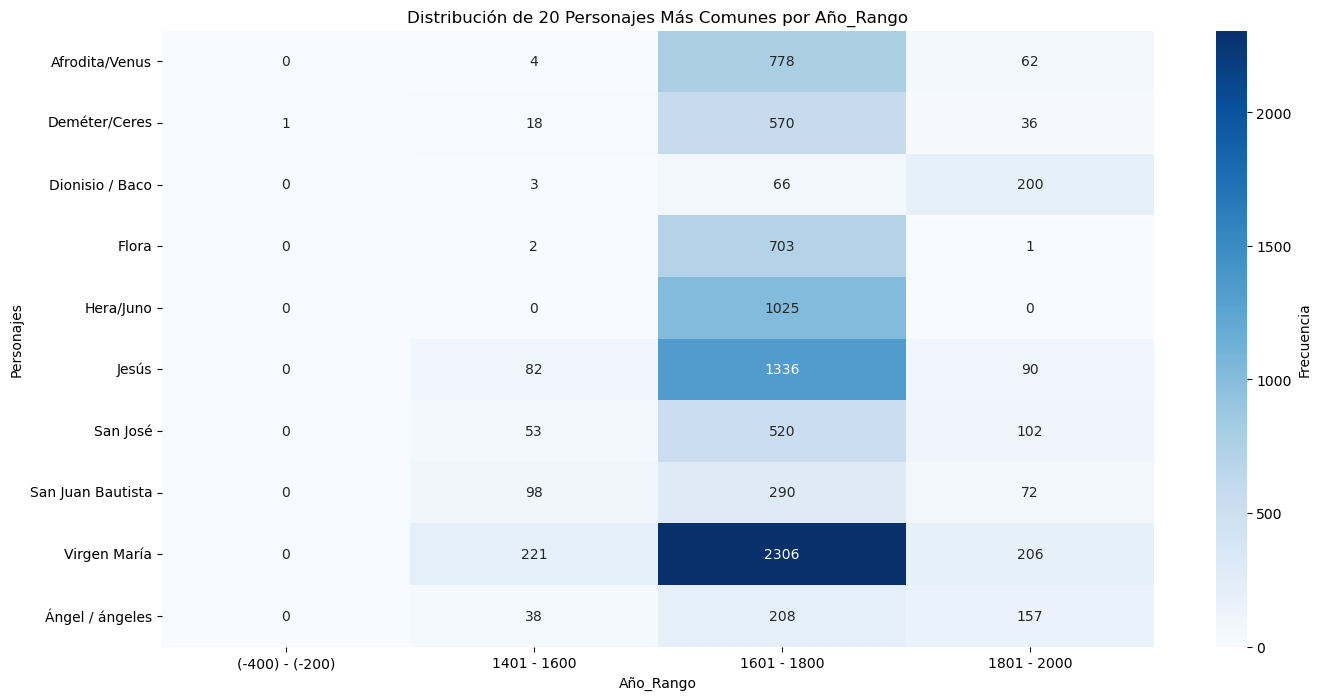

In [47]:
# En este caso lo voy a ahcer con los 10 más comunes para que se visualice mejor
diez_personajes_mas_comunes = personajes_año_rango['Personajes'].value_counts().nlargest(10).index

# Filtra el DataFrame original solo para los personajes más comunes
df_personajes_comunes = personajes_año_rango[personajes_año_rango['Personajes'].isin(diez_personajes_mas_comunes)]

# Conteo de frecuencia
tabla_contingencia = pd.crosstab(df_personajes_comunes['Personajes'], df_personajes_comunes['Año_rango'])

# Visualización del gráfico de barras
plt.figure(figsize=(16, 8))
sns.heatmap(tabla_contingencia, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Frecuencia'})
plt.title('Distribución de 20 Personajes Más Comunes por Año_Rango')
plt.xlabel('Año_Rango')
plt.ylabel('Personajes')
plt.show()

Colores en el Mapa de Calor: Cada celda del mapa de calor está coloreada de acuerdo con la frecuencia con la que un personaje específico aparece en un rango de años determinado. Los colores más oscuros indican una frecuencia más alta, mientras que los colores más claros indican una frecuencia más baja.
Anotaciones: Dentro de cada celda, puedes ver números que representan la frecuencia exacta con la que un personaje aparece en un determinado rango de años. Esto te da una idea numérica de la distribución.
Interpretación:

Las áreas más oscuras en el gráfico indican que un personaje específico es más prevalente durante esos rangos de años.
Las áreas más claras sugieren que un personaje puede no estar tan presente en esos períodos particulares.
Al observar patrones, puedes identificar tendencias en la popularidad o representación de los personajes a lo largo del tiempo.
Este tipo de visualización es útil para realizar comparaciones rápidas y entender cómo ha evolucionado la representación de los personajes más comunes en diferentes épocas.
En resumen, el heatmap te brinda una visión visual de cómo se distribuyen los 20 personajes más comunes en relación con diferentes rangos de años, ayudándote a identificar patrones y tendencias a lo largo del tiempo.

Para crear un gráfico de líneas temporales por personaje:

In [48]:
# Con el fin de preparar el DataFrame para el gráfico de líneas: Agrupa por Personaje y Año_Rango y cuenta la frecuencia
line_chart_data = df_personajes_comunes.groupby(['Personajes', 'Año_rango']).size().reset_index(name='Frecuencia')

In [49]:
# Convierte las cadenas de texto a tipo category en la columna 'Año_rango'
line_chart_data['Año_rango'] = line_chart_data['Año_rango'].astype

TypeError: Invalid object type at position 0

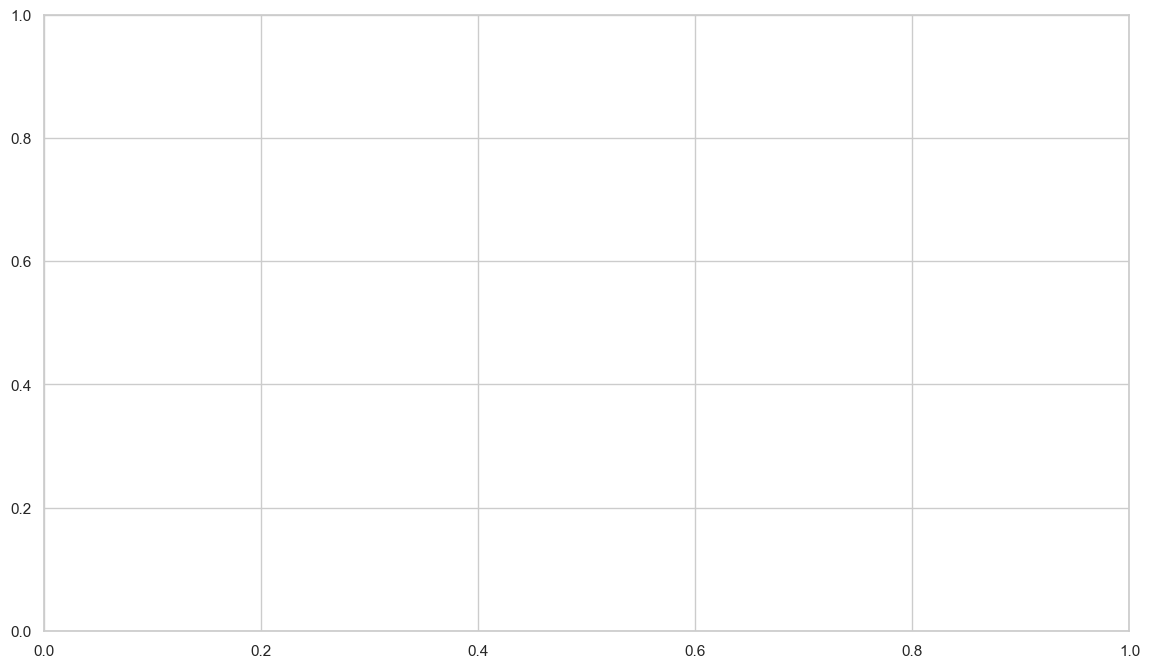

In [51]:
sns.set(style="whitegrid")

# Crea el gráfico de líneas
plt.figure(figsize=(14, 8))
sns.lineplot(x='Año_rango', y='Frecuencia', hue='Personajes', data=line_chart_data, marker='o')


# Configura el título y las etiquetas
plt.title('Frecuencia de Aparición de Personajes a lo largo del Tiempo')
plt.xlabel('Año_Rango')
plt.ylabel('Frecuencia')

# Muestra la leyenda
plt.legend(title='Personajes', loc='upper left', bbox_to_anchor=(1, 1))

# Muestra el gráfico
plt.show()

Estudio Comparativo: Comparación entre Personajes: Compara la frecuencia de aparición de varios personajes a lo largo de los años. Puedes usar subgráficos para visualizar cada personaje por separado.

In [53]:
personajes_año_rango

,Personajes,Año_rango,Frecuencia
0,Virgen María,1401 - 1600,221
1,Virgen María,1601 - 1800,2306
2,Virgen María,1601 - 1800,2306
3,Virgen María,1601 - 1800,2306
4,Virgen María,1601 - 1800,2306
...,...,...,...
12659,Jesús,1401 - 1600,82
12660,Jesús,1401 - 1600,82
12661,Virgen María,1401 - 1600,221
12662,Virgen María,1401 - 1600,221


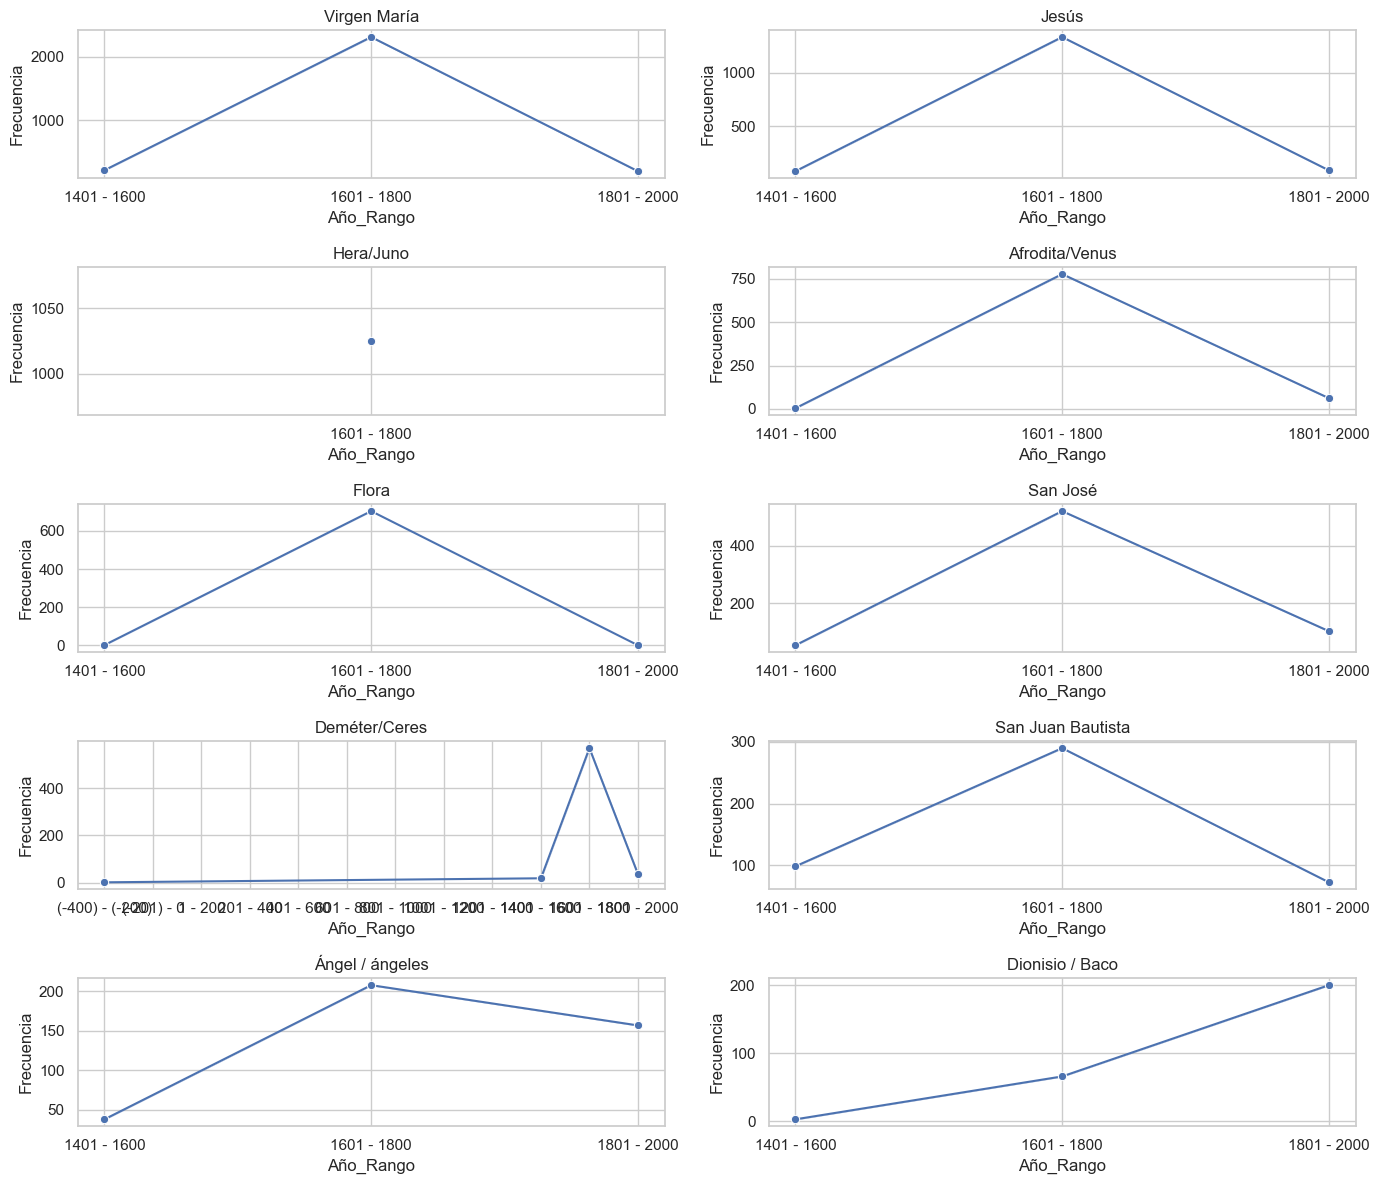

In [54]:
# Obtén los diez personajes más comunes
personajes_mas_comunes = personajes_año_rango['Personajes'].value_counts().nlargest(10).index

# Filtra el DataFrame para incluir solo los diez personajes más comunes
top_10_data = personajes_año_rango[personajes_año_rango['Personajes'].isin(personajes_mas_comunes)]

# Establece el estilo de la cuadrícula
sns.set(style="whitegrid")

# Crea subgráficos para cada personaje
plt.figure(figsize=(14, 12))
for i, personaje in enumerate(personajes_mas_comunes, 1):
    plt.subplot(5, 2, i)
    sns.lineplot(x='Año_rango', y='Frecuencia', data=top_10_data[top_10_data['Personajes'] == personaje], marker='o')
    plt.title(personaje)
    plt.xlabel('Año_Rango')
    plt.ylabel('Frecuencia')

# Ajusta el diseño de los subgráficos
plt.tight_layout()

# Muestra los subgráficos
plt.show()

4.  de Cambios Significativos: Identificación de Cambios Bruscos: Investiga y analiza cambios significativos en la frecuencia de aparición de personajes en ciertos períodos de tiempo.

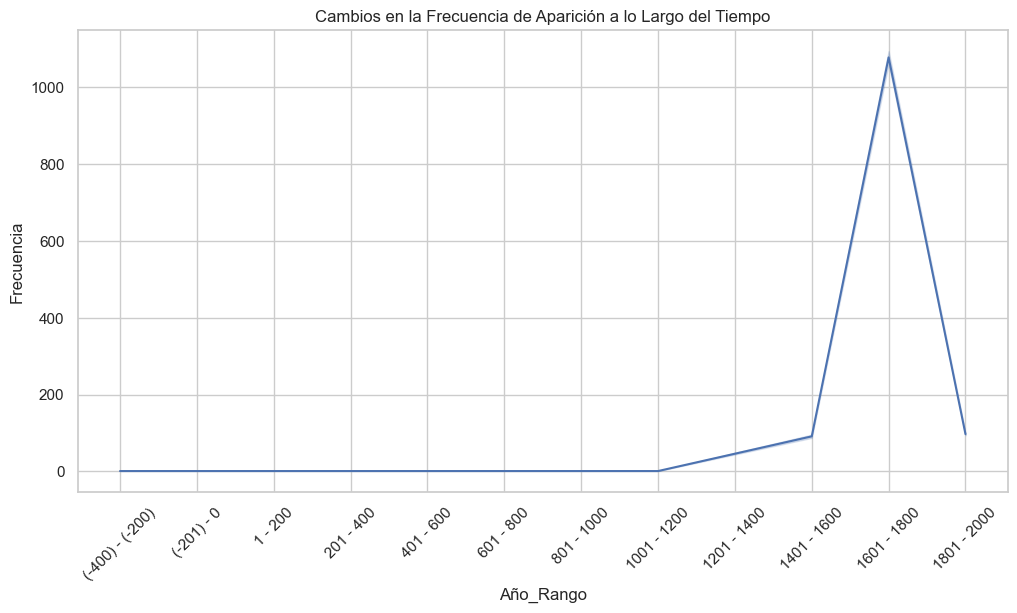

In [55]:
# Gráfico de líneas para ver cambios a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año_rango', y='Frecuencia', data=personajes_año_rango)
plt.title('Cambios en la Frecuencia de Aparición a lo Largo del Tiempo')
plt.xlabel('Año_Rango')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [56]:
# Calcula cambios porcentuales entre periodos
personajes_año_rango['Cambio_Porcentual'] = personajes_año_rango['Frecuencia'].pct_change() * 100

Aplicar pruebas estadísticas:
Para realizar pruebas estadísticas, puedes comparar dos períodos adyacentes utilizando una prueba t u otra prueba relevante.

Hago esto para ver si hay diferencia entre los dos rangos donde más personajes iconográficos se ven representados:

In [57]:
from scipy.stats import ttest_ind

# Ejemplo de prueba t para comparar dos períodos

# Filtrar el rango 1001 al 1400 para periodo_actual
periodo_anterior = personajes_año_rango.loc[(personajes_año_rango['Año_rango'] == '1001 - 1200') | (personajes_año_rango['Año_rango'] == '1201 - 1400'), 'Frecuencia']

# Filtrar el rango 1401 al 2000 para periodo_anterior
periodo_actual = personajes_año_rango.loc[(personajes_año_rango['Año_rango'] == '1201 - 1400') | (personajes_año_rango['Año_rango'] == '1401 - 1600'), 'Frecuencia'].shift(1).dropna()

resultado_prueba_t, p_valor = ttest_ind(periodo_anterior, periodo_actual)
resultado_prueba_t, p_valor

(-1.6844468848399714, 0.09239139762534457)

La prueba t es una herramienta estadística utilizada para determinar si hay una diferencia significativa entre las medias de dos grupos. En este caso, estás utilizando la prueba t para comparar las frecuencias de aparición de personajes en dos períodos consecutivos.

El resultado de la prueba t consta de dos partes principales:

Estadístico de prueba (resultado_prueba_t): Es un número que indica cuánto difieren las medias de los dos grupos en términos de desviación estándar. Un valor mayor en valor absoluto indica una mayor diferencia.
Valor p (p_valor): Es la probabilidad de observar una diferencia tan extrema o más extrema que la observada en tus datos, asumiendo que la hipótesis nula es verdadera. En términos simples, un valor p bajo (generalmente menos de 0.05) sugiere que hay evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia significativa.
Entonces, si el valor p es menor que un umbral comúnmente aceptado (como 0.05), se suele interpretar como que hay una diferencia significativa entre las frecuencias de los dos períodos.

Por ejemplo, si p_valor es menor que 0.05, podrías decir que hay evidencia suficiente para sugerir que la frecuencia de aparición de personajes ha cambiado significativamente entre los dos períodos que estás comparando. Si es mayor que 0.05, no tendrías evidencia suficiente para rechazar la hipótesis nula de que no hay diferencia significativa.

In [58]:
# Supongamos que tienes un DataFrame llamado 'df' con columnas 'Año_rango' y 'Personajes'

# Agrupa por año y cuenta la cantidad de cada personaje
grupo_personajes = personajes_año_rango.groupby(['Año_rango', 'Personajes']).size().reset_index(name='Frecuencia')

# Calcula las frecuencias relativas
personajes_año_rango['Frecuencia_relativa'] = personajes_año_rango['Frecuencia'] / personajes_año_rango.groupby('Año_rango')['Frecuencia'].transform('sum')

# Calcula el índice de Shannon para cada grupo
personajes_año_rango['Shannon'] = -1 * (personajes_año_rango['Frecuencia_relativa'] * np.log(personajes_año_rango['Frecuencia_relativa'])).groupby(personajes_año_rango['Año_rango']).transform('sum')

# Promedia los valores del índice de Shannon a lo largo de los años
indice_shannon_promedio = personajes_año_rango.groupby('Año_rango')['Shannon'].mean().reset_index()
indice_shannon_promedio


,Año_rango,Shannon
0,(-400) - (-200),0.000000
1,(-201) - 0,0.000000
2,1 - 200,NaN
3,201 - 400,NaN
4,401 - 600,NaN
5,601 - 800,NaN
6,801 - 1000,NaN
7,1001 - 1200,0.693147
8,1201 - 1400,NaN
9,1401 - 1600,6.599275


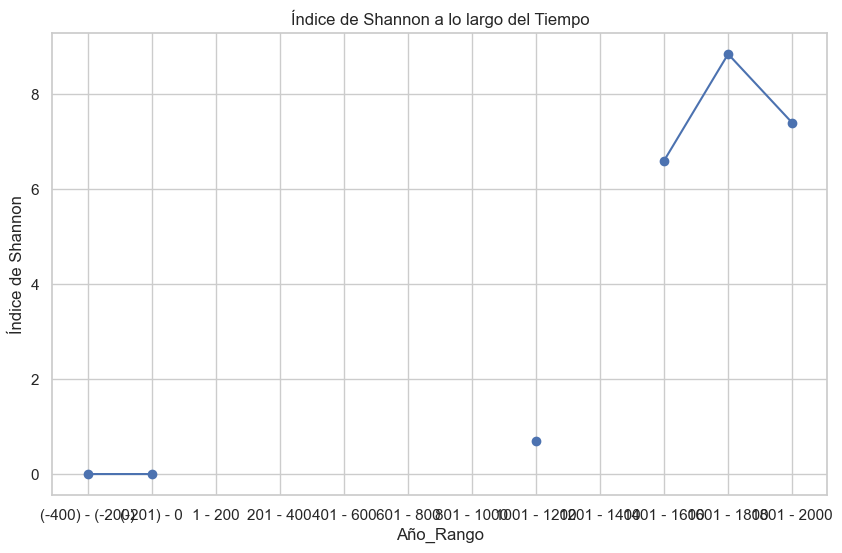

In [59]:
# Visualiza el índice de Shannon a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(indice_shannon_promedio['Año_rango'], indice_shannon_promedio['Shannon'], marker='o')
plt.title('Índice de Shannon a lo largo del Tiempo')
plt.xlabel('Año_Rango')
plt.ylabel('Índice de Shannon')
plt.show()

El Índice de Shannon es una medida de la diversidad biológica en un ecosistema. En el contexto de tus datos sobre personajes a lo largo del tiempo, puedes considerar cada año o rango de años como un "ecosistema" y cada personaje como una "especie". 

En términos más sencillos, el Índice de Shannon considera dos aspectos principales de la diversidad:

Riqueza de Especies (S): La cantidad total de especies en el ecosistema. En tu caso, sería la cantidad total de personajes en un año o rango de años.
Equidad (o uniformidad): Cómo se distribuyen las abundancias relativas de las especies en el ecosistema. Un índice de Shannon más alto indica una distribución más equitativa de las especies.
Interpretación:

Un Índice de Shannon más alto generalmente indica una mayor diversidad en el ecosistema.
Un Índice de Shannon más bajo podría indicar una mayor dominancia de unas pocas especies.
En el contexto de tus datos, si aplicas el Índice de Shannon a cada año o rango de años, obtendrás una medida de la diversidad de personajes en esos períodos. Puedes seguir cómo este índice cambia a lo largo del tiempo para tener una idea de cómo la diversidad de personajes evoluciona en tu conjunto de datos.

ESTO ES PARA AUTORES

8. Análisis de Redes: Red de Personajes: Si dispones de información sobre las interacciones entre personajes, crea una red de personajes y analiza cómo evoluciona a lo largo del tiempo.

In [62]:
titulo_personajes_año_rango = obras_completo[["Título", "Personajes", "Año_rango"]]
titulo_personajes_año_rango

,Título,Personajes,Año_rango
0,"""Floreros""",Desconocidos,1601 - 1800
1,"""Floreros""",Desconocidos,1601 - 1800
2,"""Floreros""",Desconocidos,1601 - 1800
3,"""Floreros""",Desconocidos,1601 - 1800
4,"""Floreros""",Desconocidos,1601 - 1800
...,...,...,...
21732,"""Niños jugando a los dados""",Desconocidos,1801 - 2000
21733,"""Niños jugando a los dados""",Desconocidos,1801 - 2000
21734,"""Niños jugando a los dados""",Desconocidos,1801 - 2000
21735,"""Niños jugando a los dados""",Desconocidos,1801 - 2000


In [63]:
titulo_personajes_año_rango = titulo_personajes_año_rango[titulo_personajes_año_rango['Personajes'] != 'Desconocidos']

# Restablecer los índices después de eliminar las filas
titulo_personajes_año_rango = titulo_personajes_año_rango.reset_index(drop=True)

In [64]:
titulo_personajes_año_rango

,Título,Personajes,Año_rango
0,"""La Anunciación""",Virgen María,1401 - 1600
1,"""La Inmaculada Concepción""",Virgen María,1601 - 1800
2,"""La Inmaculada Concepción""",Virgen María,1601 - 1800
3,"""La Inmaculada Concepción""",Virgen María,1601 - 1800
4,"""La Inmaculada Concepción""",Virgen María,1601 - 1800
...,...,...,...
12659,"""La Virgen con el Niño""",Jesús,1401 - 1600
12660,"""La Virgen con el Niño""",Jesús,1401 - 1600
12661,"""La Virgen con el Niño""",Virgen María,1401 - 1600
12662,"""La Virgen con el Niño""",Virgen María,1401 - 1600


In [65]:
titulo_personajes_frecuencia = titulo_personajes_año_rango.groupby(['Título', 'Personajes']).size().reset_index(name='Frecuencia')
titulo_personajes_frecuencia

,Título,Personajes,Frecuencia
0,"""A Francisco Martínez de la Rosa, en su muerte""",Francisco Martínez de la Rosa,1
1,"""A Salustiano de Olózaga""",Salustiano de Olózaga,1
2,"""Adoración de los Reyes Magos""",Jesús,1
3,"""Adoración de los Reyes Magos""",Reyes Magos,1
4,"""Adoración de los Reyes Magos""",San José,1
...,...,...,...
459,"""Visión de san Francisco en la Porciúncula""",Jesús,2
460,"""Visión de san Francisco en la Porciúncula""",San Francisco de Asís,2
461,"""Visión de san Francisco en la Porciúncula""",Virgen María,2
462,"""Visión de san Francisco en la Porciúncula""",Ángel / ángeles,2


cuantas veces aparece un mismo personaje dentro de u cuadro pero no es eso lo que quiero conseguir. Lo que quiero conseguir es saber si, por ejemplo, la Virgen Maria y Jesus aparecen muchas veces dentro de un mismo titulo o suelen aparecer separados 

In [66]:
# Agrupa por el título y cuenta la cantidad de personajes únicos
titulo_personajes_unicos = titulo_personajes_frecuencia.groupby('Título')['Personajes'].nunique().reset_index(name='Cantidad_Personajes_Unicos')

In [67]:
titulo_personajes_unicos

,Título,Cantidad_Personajes_Unicos
0,"""A Francisco Martínez de la Rosa, en su muerte""",1
1,"""A Salustiano de Olózaga""",1
2,"""Adoración de los Reyes Magos""",4
3,"""Adoración del Sagrado Corazón de Jesús""",11
4,"""Adán antes de comer el fruto""",1
...,...,...
212,"""Venus descubre a Adonis muerto""",3
213,"""Venus, Adonis y Cupido""",3
214,"""Visión de Santa Teresa / Apuntes""",1
215,"""Visión de san Francisco en la Porciúncula""",4


In [68]:
# Agrupa por el título y obtén la lista de personajes únicos
titulo_personajes = titulo_personajes_frecuencia.groupby('Título')['Personajes'].unique().reset_index(name='Personajes_en_obra')
titulo_personajes

,Título,Personajes_en_obra
0,"""A Francisco Martínez de la Rosa, en su muerte""",[Francisco Martínez de la Rosa]
1,"""A Salustiano de Olózaga""",[Salustiano de Olózaga]
2,"""Adoración de los Reyes Magos""","[Jesús, Reyes Magos, San José, Virgen María]"
3,"""Adoración del Sagrado Corazón de Jesús""","[San Agustín, San Bernardo de Claraval, San Fr..."
4,"""Adán antes de comer el fruto""",[Adán]
...,...,...
212,"""Venus descubre a Adonis muerto""","[Adonis, Afrodita/Venus, Cupido/Eros]"
213,"""Venus, Adonis y Cupido""","[Adonis, Afrodita/Venus, Cupido/Eros]"
214,"""Visión de Santa Teresa / Apuntes""",[Ángel / ángeles]
215,"""Visión de san Francisco en la Porciúncula""","[Jesús, San Francisco de Asís, Virgen María, Á..."


In [69]:
#Los 10 personajes que más aparecen en las obras

In [70]:
top_10_personajes_en_obras = titulo_personajes_frecuencia.groupby('Personajes').sum()['Frecuencia'].nlargest(10).reset_index()
top_10_personajes_en_obras

,Personajes,Frecuencia
0,Virgen María,2733
1,Jesús,1508
2,Hera/Juno,1025
3,Afrodita/Venus,844
4,Flora,706
5,San José,675
6,Deméter/Ceres,625
7,San Juan Bautista,460
8,Ángel / ángeles,403
9,Dionisio / Baco,269


In [89]:
import pandas as pd

# Supongamos que tienes tu DataFrame original 'titulo_personajes' y el DataFrame con los personajes y su frecuencia 'personajes_frecuencia'

# Lista de los personajes que deseas seleccionar
personajes_seleccionados = ["Virgen María", "Jesús", "Hera/Juno", "Afrodita/Venus", "Flora", "San José", "Deméter/Ceres", "San Juan Bautista", "Ángel / ángeles", "Dionisio / Baco"]

# Filtrar el DataFrame original para incluir solo las filas con los personajes seleccionados
titulo_personajes_seleccionados = titulo_personajes[titulo_personajes['Personajes_en_obra'].apply(lambda x: any(personaje in x for personaje in personajes_seleccionados))]


titulo_personajes_seleccionados

,Título,Personajes_en_obra
2,"""Adoración de los Reyes Magos""","[Jesús, Reyes Magos, San José, Virgen María]"
3,"""Adoración del Sagrado Corazón de Jesús""","[San Agustín, San Bernardo de Claraval, San Fr..."
9,"""Aparición de la Virgen a san Bernardo""","[San Bernardo de Claraval, Virgen María, Ángel..."
10,"""Aparición del Niño Jesús a san Antonio de Padua""","[Jesús, San Antonio de Padua]"
14,"""Cabeza de Antinoo como Baco""",[Dionisio / Baco]
...,...,...
212,"""Venus descubre a Adonis muerto""","[Adonis, Afrodita/Venus, Cupido/Eros]"
213,"""Venus, Adonis y Cupido""","[Adonis, Afrodita/Venus, Cupido/Eros]"
214,"""Visión de Santa Teresa / Apuntes""",[Ángel / ángeles]
215,"""Visión de san Francisco en la Porciúncula""","[Jesús, San Francisco de Asís, Virgen María, Á..."


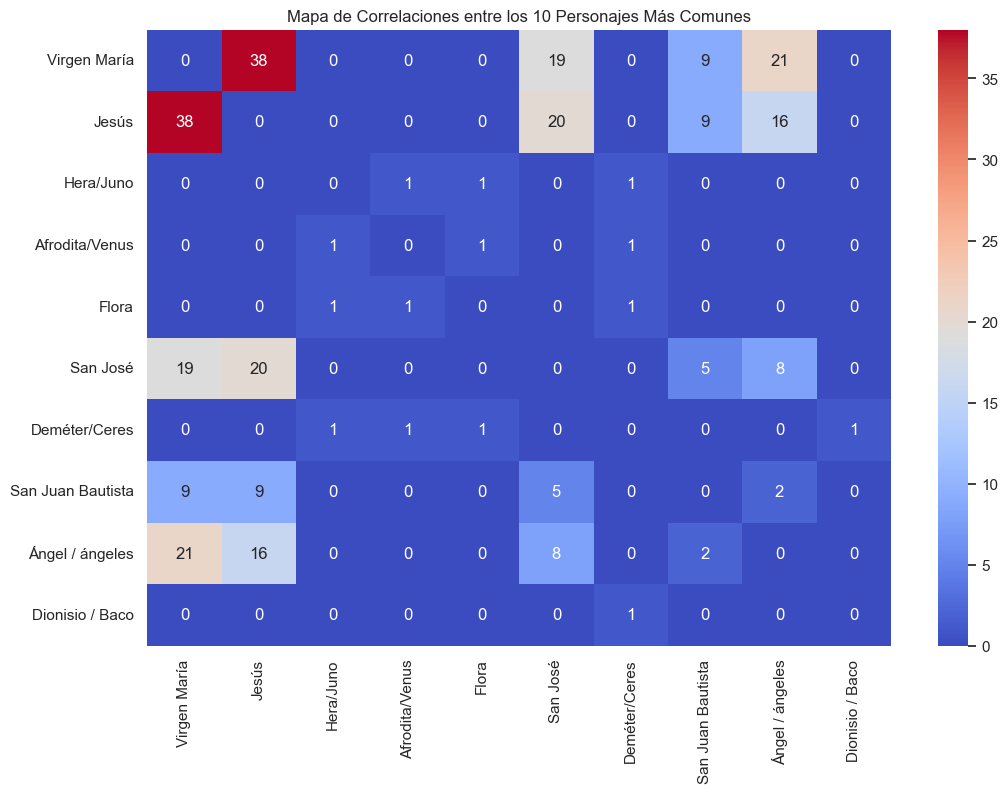

In [92]:
# Seleccionar solo los 10 personajes más comunes
personajes_comunes = ['Virgen María', 'Jesús', 'Hera/Juno', 'Afrodita/Venus', 'Flora', 'San José', 'Deméter/Ceres', 'San Juan Bautista', 'Ángel / ángeles', 'Dionisio / Baco']
titulo_personajes['Personajes_en_obra'] = titulo_personajes['Personajes_en_obra'].apply(lambda x: [p for p in x if p in personajes_comunes])

# Crear un diccionario para mapear personajes a índices
personajes_dict = {personaje: idx for idx, personaje in enumerate(personajes_comunes)}

# Crear una matriz de ceros para el mapa de correlaciones
correlation_matrix = pd.DataFrame(0, index=personajes_comunes, columns=personajes_comunes)

# Llenar la matriz con la frecuencia de aparición de cada par de personajes
for personajes_en_obra in titulo_personajes['Personajes_en_obra']:
    for i in range(len(personajes_en_obra)):
        for j in range(i + 1, len(personajes_en_obra)):
            personaje1 = personajes_en_obra[i]
            personaje2 = personajes_en_obra[j]
            # Incrementar la frecuencia en la matriz
            correlation_matrix.at[personaje1, personaje2] += 1
            correlation_matrix.at[personaje2, personaje1] += 1

# Configuración del gráfico de mapa de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt='d')
plt.title('Mapa de Correlaciones entre los 10 Personajes Más Comunes')
plt.show()

In [72]:
#%pip install networkx

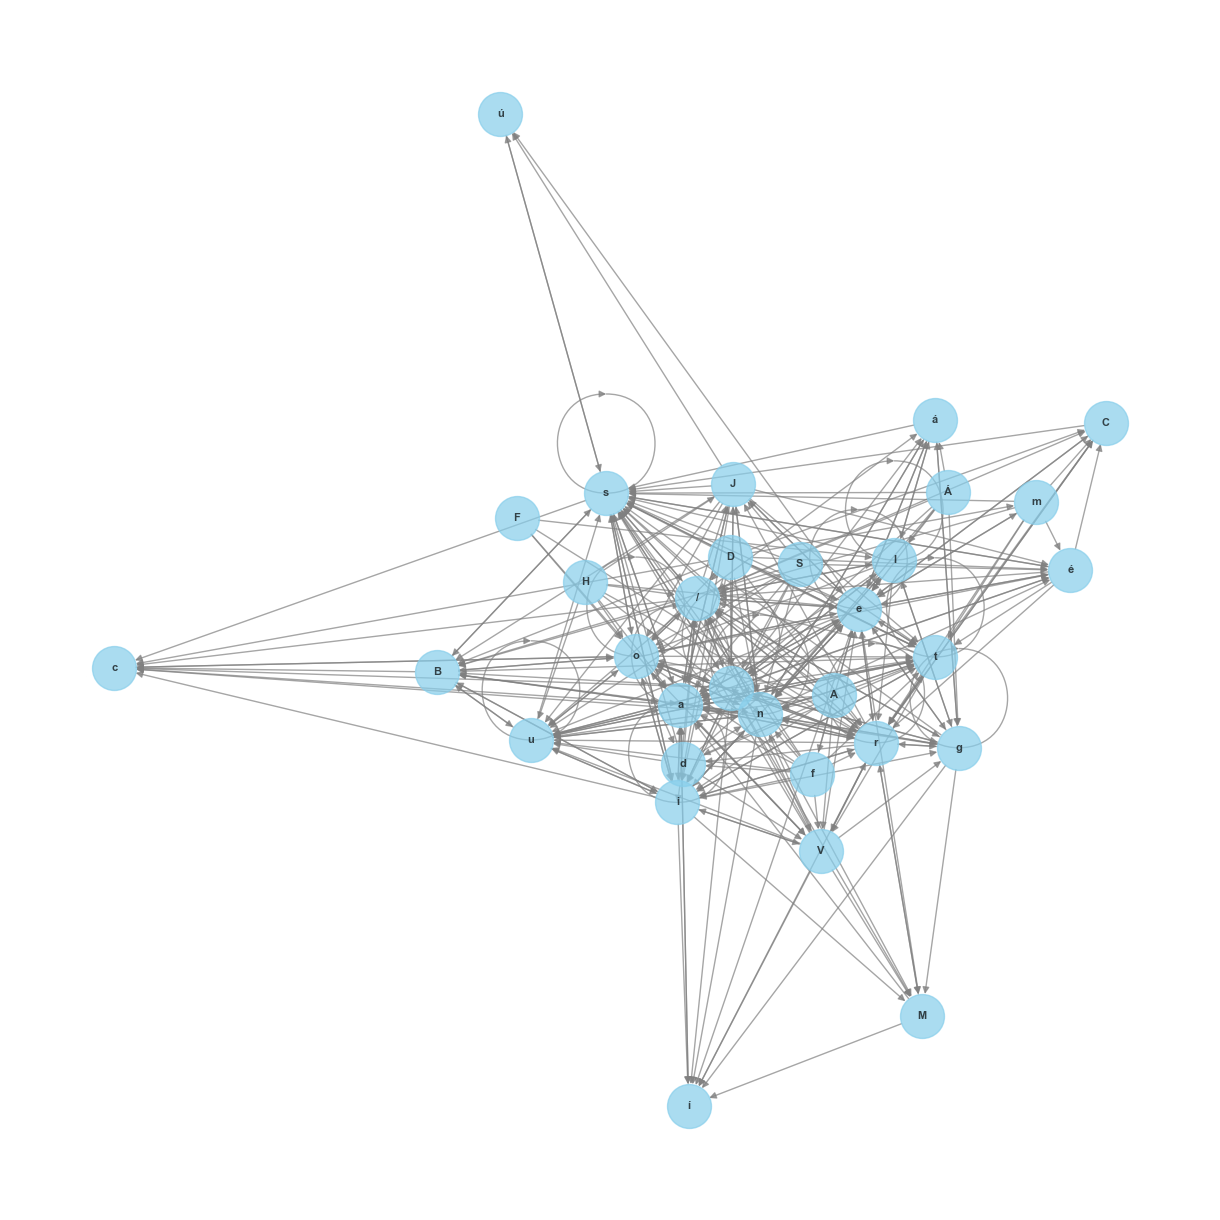

In [78]:
# Crear un grafo dirigido
G = nx.DiGraph()

# Iterar a través de cada fila del DataFrame
for _, row in df_top_10.iterrows():
    personajes = row['Personajes']
    # Agregar una arista para cada par de personajes en la fila
    for i in range(len(personajes)):
        for j in range(i + 1, len(personajes)):
            G.add_edge(personajes[i], personajes[j])

# Dibujar el grafo
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, font_size=8, font_color='black', node_size=1000, node_color='skyblue', edge_color='gray', font_weight='bold', alpha=0.7)

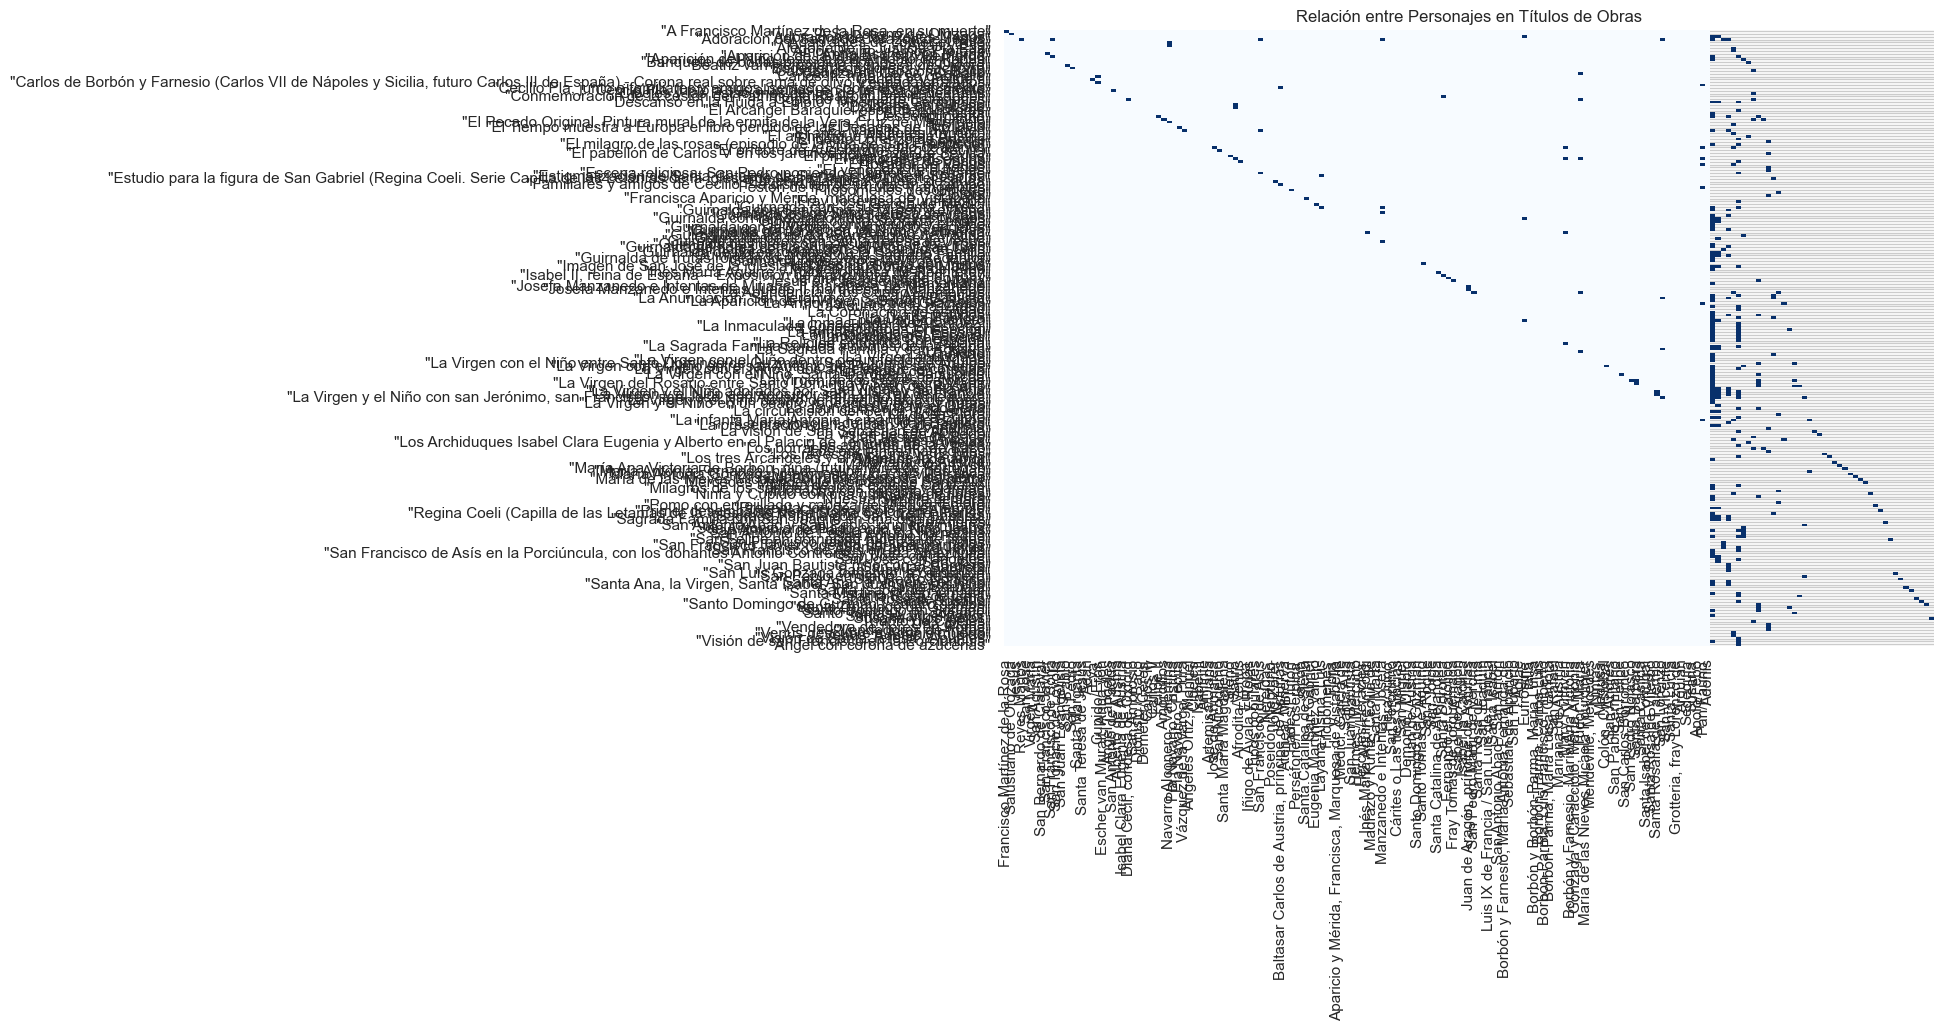

In [85]:
# Crear un diccionario para mapear personajes a índices
personajes_dict = {personaje: idx for idx, personajes in enumerate(titulo_personajes['Personajes_en_obra']) for personaje in personajes}

# Crear una matriz de ceros para el heatmap
heatmap_data = pd.DataFrame(0, index=range(len(titulo_personajes)), columns=range(len(personajes_dict)))

# Llenar la matriz con 1 donde hay una relación entre personaje y obra
for i, personajes in enumerate(titulo_personajes['Personajes_en_obra']):
    for personaje in personajes:
        heatmap_data.at[i, personajes_dict[personaje]] = 1

# Configuración del gráfico de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Blues", cbar=False, annot=False, xticklabels=list(personajes_dict.keys()), yticklabels=titulo_personajes['Título'])
plt.title('Relación entre Personajes en Títulos de Obras')
plt.show()

In [87]:
top_10_personajes = titulo_personajes['Personajes_en_obra'].value_counts().nlargest(10).index

# Filtrar el DataFrame para incluir solo los 10 personajes más comunes
titulo_personajes_top_10 = titulo_personajes[titulo_personajes['Personajes_en_obra'].isin(top_10_personajes)]

# Crear un diccionario para mapear personajes a índices
personajes_dict = {personaje: idx for idx, personajes in enumerate(titulo_personajes_top_10['Personajes_en_obra']) for personaje in personajes}

# Crear una matriz de ceros para el heatmap
heatmap_data = pd.DataFrame(0, index=range(len(titulo_personajes_top_10)), columns=range(len(personajes_dict)))

# Llenar la matriz con 1 donde hay una relación entre personaje y obra
for i, personajes in enumerate(titulo_personajes_top_10['Personajes_en_obra']):
    for personaje in personajes:
        heatmap_data.at[i, personajes_dict[personaje]] = 1

# Configuración del gráfico de heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="Blues", cbar=False, annot=False, xticklabels=list(personajes_dict.keys()), yticklabels=titulo_personajes_top_10['Título'])
plt.title('Relación entre los 10 Personajes más comunes en Títulos de Obras')
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

In [73]:
personajes_año_rango.describe(include=object)

,Personajes
count,12664
unique,139
top,Virgen María
freq,2733


In [74]:
personajes_año_rango_dummy = pd.get_dummies(personajes_año_rango, drop_first=True)

In [ ]:
personajes_año_rango_dummy

In [ ]:
# Group the data by range_years and count the occurrences of each character
character_counts = personajes_año_rango.groupby('Año_rango')['Personajes'].value_counts()